# # Project: Investigate a Dataset (TMDb_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Some of the attributes of data set:

id :Index or id
    
imdb_id :Unique ID given by IMDB
    
popularity :Popularity of the movie
    
budget :Budget of the movie
    
revenue :Revenue by the movie
    
original_title :Film Name
    
director :Director or Directoers of the film
    
keywords :Keywords related to film
    
runtime :Film length or duration
    
genres :Type of movie
    
production_companies :Companies that have invested to the film
    
vote_count :Number of votes
    
vote_average :Averat=ge vote rating
    
release_year :released year

# <a id='intro'></a>
## Introduction

      I am using tmdb_movies dataset to complete my project. 
      
      This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including 
      user ratings and revenue.
      
      Questions that can be answered from this dataset
      
      1) What is the average runtime of all movies?
      2) Movies which had most and least profit?
      3) Movies with largest and lowest budgets?
      4) Any relation between year of release and profit?
      5) Movies with largest and lowest revenues?
      6) Number of profitable movies released in each month?
      7) Profits made by movie with respect to their release month?
      8) Which director directed the most films?
      9) Director vs Profit?
      10) Which genres are most popular? 
      11) Cast appeared the most?
      12) Average budget of movies?
      13) Average revenue of movies?
      14) Average profit of movies?
      15) What variables are associated with the runtime of movies over the years?

In [1]:
# Importing all neccesarry packages for our analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data

df_movies = pd.read_csv('tmdb-movies.csv')

# Look a sample of data that is loaded into the dataframe

df_movies.head()

# Look into the number of rows and columns in the imporeted dataset

df_movies.shape

# types and look for instances of missing or possibly errant data.

df_movies.dtypes


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

# ### Data Cleaning 
#### Before answering the above questions we need a clean dataset which has columns and rows we need for calculations.
First, lets clean up the columns. We will only keep the columns we need and remove the rest of them.
Columns to delete -  id, imdb_id, budget_adj, revenue_adj, homepage, keywords, overview, production_companies.

In [3]:
col_to_delete = ['id','imdb_id','budget_adj','revenue_adj','homepage','keywords','overview','production_companies']

# The above unused columns are removed from the dataset

df_movies.drop(col_to_delete, axis=1, inplace=True)

# To visualize sample data after removing unnecessary columns from the dataset

df_movies.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


Lets check for the missing values and clean the data

In [4]:
# To check the boundaries of the dataset

df_movies.shape

(10866, 13)

Its clear that the resultant dataset after removing unused columns has 13 columns and 10866 rows of data.

Check for the non null values using pandas info function

In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
tagline           8042 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


Hence the missing values are from cast, director,tagline,genres.

By using machine learning strategies we can fill them.

So dropping the null values now.

In [6]:
# Dropping null values using pandas dropna function

df_movies.dropna(inplace=True)

# Check for null values

df_movies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8002 entries, 0 to 10865
Data columns (total 13 columns):
popularity        8002 non-null float64
budget            8002 non-null int64
revenue           8002 non-null int64
original_title    8002 non-null object
cast              8002 non-null object
director          8002 non-null object
tagline           8002 non-null object
runtime           8002 non-null int64
genres            8002 non-null object
release_date      8002 non-null object
vote_count        8002 non-null int64
vote_average      8002 non-null float64
release_year      8002 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 875.2+ KB


The null values in the dataset are removed and the dataset contains 8002 rows and 13 columns.

Now lets see for any duplicates present in the dataset.

In [7]:
sum(df_movies.duplicated())

1

So from the above result, it is clear that the dataset contains only 1 duplicated row.

Remove the duplicated row

In [8]:
df_movies.drop_duplicates(inplace=True)

# Check for dupliacted rows in the dataset

sum(df_movies.duplicated())

0

Hence no dupliacted rows present in the datset.

Visualize the dataset to check whether any cleaning of data required

In [9]:
df_movies.tail(20)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
10843,0.252399,0,0,Khartoum,Charlton Heston|Laurence Olivier|Richard Johns...,Basil Dearden|Eliot Elisofon,"Where the Nile divides, the great Cinerama adv...",134,Adventure|Drama|War|History|Action,6/9/66,12,5.8,1966
10844,0.236098,0,0,Our Man Flint,James Coburn|Lee J. Cobb|Gila Golan|Edward Mul...,Daniel Mann,The ORIGINAL man of mystery!,108,Adventure|Comedy|Fantasy|Science Fiction,1/16/66,13,5.6,1966
10845,0.230873,0,0,Carry On Cowboy,Sid James|Jim Dale|Angela Douglas|Kenneth Will...,Gerald Thomas,How the west was lost!,93,Comedy|Western,3/1/66,15,5.9,1966
10846,0.212716,0,0,Dracula: Prince of Darkness,Christopher Lee|Barbara Shelley|Andrew Keir|Fr...,Terence Fisher,"DEAD for Ten Years DRACULA, Prince of Darkness...",90,Horror,1/9/66,16,5.7,1966
10847,0.034555,0,0,Island of Terror,Peter Cushing|Edward Judd|Carole Gray|Eddie By...,Terence Fisher,How could they stop the devouring death...that...,89,Science Fiction|Horror,6/20/66,13,5.3,1966
10848,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,A Fantastic and Spectacular Voyage... Through ...,100,Adventure|Science Fiction,8/24/66,42,6.7,1966
10849,0.206537,0,0,Gambit,Michael Caine|Shirley MacLaine|Herbert Lom|Joh...,Ronald Neame,Shirley MacLaine raises Michael Caine!,109,Action|Comedy|Crime,12/16/66,14,6.1,1966
10850,0.202473,0,0,Harper,Paul Newman|Lauren Bacall|Julie Harris|Arthur ...,Jack Smight,Harper takes a case - and the payoff is murder.,121,Action|Drama|Thriller|Crime|Mystery,2/23/66,14,6.0,1966
10851,0.342791,0,0,Born Free,Virginia McKenna|Bill Travers|Geoffrey Keen|Pe...,James Hill,From The Pages Of The Beloved Best Seller... A...,95,Adventure|Drama|Action|Family|Foreign,6/22/66,15,6.6,1966
10852,0.227220,0,0,A Big Hand for the Little Lady,Henry Fonda|Joanne Woodward|Jason Robards|Paul...,Fielder Cook,All the action you can take...all the adventur...,95,Western,5/31/66,11,6.0,1966


'0' value in budget and revenue doesn't make sense.

Might be these values are missed and stored as 0 in the datset.

In [10]:
# change the values of 0's in budget and revenue to Null

df_movies['budget'] = df_movies['budget'].replace(0, np.NAN)
df_movies['revenue'] = df_movies['revenue'].replace(0, np.NAN)

#Visualize the last few rows whetherv they are replaced or not

df_movies.tail(20)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
10843,0.252399,NaN,NaN,Khartoum,Charlton Heston|Laurence Olivier|Richard Johns...,Basil Dearden|Eliot Elisofon,"Where the Nile divides, the great Cinerama adv...",134,Adventure|Drama|War|History|Action,6/9/66,12,5.8,1966
10844,0.236098,NaN,NaN,Our Man Flint,James Coburn|Lee J. Cobb|Gila Golan|Edward Mul...,Daniel Mann,The ORIGINAL man of mystery!,108,Adventure|Comedy|Fantasy|Science Fiction,1/16/66,13,5.6,1966
10845,0.230873,NaN,NaN,Carry On Cowboy,Sid James|Jim Dale|Angela Douglas|Kenneth Will...,Gerald Thomas,How the west was lost!,93,Comedy|Western,3/1/66,15,5.9,1966
10846,0.212716,NaN,NaN,Dracula: Prince of Darkness,Christopher Lee|Barbara Shelley|Andrew Keir|Fr...,Terence Fisher,"DEAD for Ten Years DRACULA, Prince of Darkness...",90,Horror,1/9/66,16,5.7,1966
10847,0.034555,NaN,NaN,Island of Terror,Peter Cushing|Edward Judd|Carole Gray|Eddie By...,Terence Fisher,How could they stop the devouring death...that...,89,Science Fiction|Horror,6/20/66,13,5.3,1966
10848,0.207257,5115000.0,12000000.0,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,A Fantastic and Spectacular Voyage... Through ...,100,Adventure|Science Fiction,8/24/66,42,6.7,1966
10849,0.206537,NaN,NaN,Gambit,Michael Caine|Shirley MacLaine|Herbert Lom|Joh...,Ronald Neame,Shirley MacLaine raises Michael Caine!,109,Action|Comedy|Crime,12/16/66,14,6.1,1966
10850,0.202473,NaN,NaN,Harper,Paul Newman|Lauren Bacall|Julie Harris|Arthur ...,Jack Smight,Harper takes a case - and the payoff is murder.,121,Action|Drama|Thriller|Crime|Mystery,2/23/66,14,6.0,1966
10851,0.342791,NaN,NaN,Born Free,Virginia McKenna|Bill Travers|Geoffrey Keen|Pe...,James Hill,From The Pages Of The Beloved Best Seller... A...,95,Adventure|Drama|Action|Family|Foreign,6/22/66,15,6.6,1966
10852,0.227220,NaN,NaN,A Big Hand for the Little Lady,Henry Fonda|Joanne Woodward|Jason Robards|Paul...,Fielder Cook,All the action you can take...all the adventur...,95,Western,5/31/66,11,6.0,1966


In [11]:
# Remove null values from the dataset

df_movies.dropna(inplace=True)

# Visualize the sample data

df_movies.tail()

#boundaries of the resultant dataset

df_movies.shape

(3572, 13)

So that we have now only 3572 rows of data in the dataset with 13 columns.

Converting the release_date into standard datetime format.

In [12]:
# converting release_date into standard datetime format

df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

# visualize sample data

df_movies.head(3)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015


Let us assume budget and revenue be in US_dollars.

So rename those columns for better understanding.

In [13]:
df_movies.rename(columns = {'revenue' : 'revenue(US_dollars)', 'budget' : 'budget(US_dollars)'}, inplace=True)

Check for any rows having runtime as 0

In [14]:
runtimeZero = df_movies['runtime'] == 0

sum(runtimeZero)

0

Above result clearly depicts that no value in runtime is zero and we done with missing and duplicated rows in the dataset.

Have a look on datatypes of columns of resultant dataframe.

In [15]:
df_movies.dtypes

popularity                    float64
budget(US_dollars)            float64
revenue(US_dollars)           float64
original_title                 object
cast                           object
director                       object
tagline                        object
runtime                         int64
genres                         object
release_date           datetime64[ns]
vote_count                      int64
vote_average                  float64
release_year                    int64
dtype: object

In [16]:
# Convert revenue and budget to int datatype from float

df_movies['revenue(US_dollars)'].astype(int,inplace=True)
df_movies['budget(US_dollars)'].astype(int,inplace=True)

# Confirm changes in the data type of revenue and budget

df_movies.dtypes

popularity                    float64
budget(US_dollars)            float64
revenue(US_dollars)           float64
original_title                 object
cast                           object
director                       object
tagline                        object
runtime                         int64
genres                         object
release_date           datetime64[ns]
vote_count                      int64
vote_average                  float64
release_year                    int64
dtype: object

Mostly the datatypes of all columns in the dataframe are same as they should be, Data type conversion is not required and we can proceed to EDA step.

<a id='eda'></a>
## Exploratory Data Analysis

Before answering the questions, lets figure out the profits of each movie.

In [17]:
# Insert a column that contains profit into the dataset

df_movies.insert(len(df_movies.columns),'profit_earned(US_dollars)',df_movies['revenue(US_dollars)'] - df_movies['budget(US_dollars)'])

# Visualize sample data

df_movies.head(2)


,popularity,budget(US_dollars),revenue(US_dollars),original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year,profit_earned(US_dollars)
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,2.284364e+08


### Research Question 1 : What is the average runtime of all movies?

In [18]:
df_movies['runtime'].mean()

109.12290033594626

Hence the average runtime of movies is nearly 109.

Deeper insights into the average run time of movies by plotting it

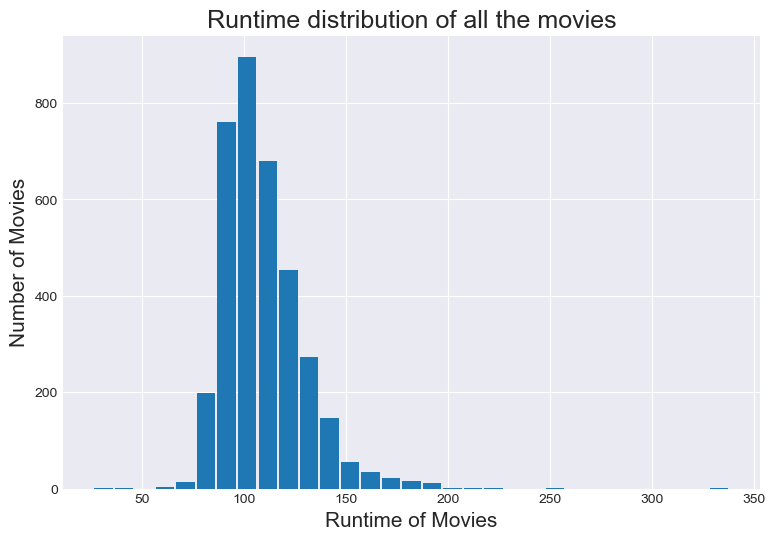

In [19]:
# plotting a histogram of runtime of movies

# Sets the style to the background using seaborn

sns.set_style('darkgrid')

# changing the label size

plt.rc('xtick', labelsize = 10)

plt.rc('ytick', labelsize = 10)

# Giving the figure size(width, height)

plt.figure(figsize=(9,6), dpi = 100)

# x-axis label name

plt.xlabel('Runtime of Movies', fontsize = 15)

# y-axis label name

plt.ylabel('Number of Movies', fontsize=15)

# Title of the graph

plt.title('Runtime distribution of all the movies', fontsize=18)

# Giving a histogram plot

plt.hist(df_movies['runtime'], rwidth = 0.9, bins =31)

# Displays the plot

plt.show()

The above graph depicts that how many movies lie between the time interval.
Tallest bar among all depicts that nearly 950+ movies has runtime in between 90-100 min. The second tallest bar among them lies in 100-110 min time interval. So from that we can say that average runtime of movies lies in between 90-110 min.

Lets see the outliers of the  runtime of movies with numbers of movies by plotting box plot

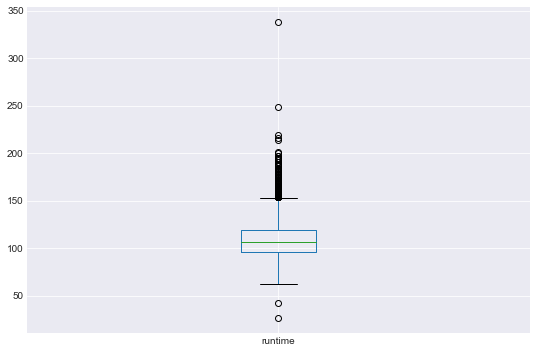

In [20]:
df_movies['runtime'].plot(kind="box",figsize=(9,6))

The outliers for the above distribution of runtime are less.

Lets analyse more about the runtime of movies dataset

In [21]:
df_movies['runtime'].describe()

count    3572.000000
mean      109.122900
std        19.686816
min        26.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

By looking at both the plot and calculations, we can conclude that..

25% of movies have a runtime of less than 96 minutes

50% of movies have a runtime of less than 106 minutes. (median)

75% of movies have a runtime of less than 119 minutes

# Research Question 2 : Movies which had most and least profit?

In [22]:
# To get the movie with highest profit

highest_profit = df_movies['profit_earned(US_dollars)'].idxmax()

highest_profit_details = df_movies.loc[highest_profit]

# To get the movie with lowest profit

lowest_profit = df_movies['profit_earned(US_dollars)'].idxmin()

lowest_profit_details = df_movies.loc[lowest_profit]

# Concatinating both highest and lowest profit earned movies

profit_details = pd.concat([highest_profit_details,lowest_profit_details],axis=1)

profit_details

,1386,2244
popularity,9.43277,0.25054
budget(US_dollars),2.37e+08,4.25e+08
revenue(US_dollars),2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


From the above results, we can conclude that the most profitable movie was Avatar and least profitable movie was The Warrior's Way.

# Research Question 3 : Movies with largest and lowest budgets?

In [23]:
# To get the movie with highest budget

highest_budget = df_movies['budget(US_dollars)'].idxmax()

highest_budget_details = df_movies.loc[highest_budget]

# To get the movie with lowest budget

lowest_budget = df_movies['budget(US_dollars)'].idxmin()

lowest_budget_details = df_movies.loc[lowest_budget]

budget_details = pd.concat([highest_budget_details,lowest_budget_details],axis=1)

budget_details

,2244,2618
popularity,0.25054,0.090186
budget(US_dollars),4.25e+08,1
revenue(US_dollars),1.10876e+07,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


From the above results, we can conclude that the movie with highest budget is The Warrior's Way and the movie with lowest budget is Lost & Found.

# Research Question 4 : Any relation between year of release and profit?

In [24]:
# To check the profit of movies in a particular year , we groupby profit_earned with release_date and add them to get the profit earned in paricular year

year_vs_profit = df_movies.groupby('release_year')['profit_earned(US_dollars)'].sum()

# Visualize the resultant dataframe

year_vs_profit

release_year
1960    1.040981e+08
1961    3.007832e+08
1962    1.668798e+08
1963    1.154119e+08
1964    2.946784e+08
1965    4.072819e+08
1966    5.246869e+07
1967    5.928346e+08
1968    1.682718e+08
1969    2.068630e+08
1970    3.200870e+08
1971    3.362847e+08
1972    3.857399e+08
1973    1.030886e+09
1974    6.265820e+08
1975    7.713739e+08
1976    4.744265e+08
1977    1.743308e+09
1978    1.002870e+09
1979    9.503302e+08
1980    1.001677e+09
1981    1.266779e+09
1982    1.793720e+09
1983    1.486674e+09
1984    1.850059e+09
1985    1.674173e+09
1986    1.659344e+09
1987    2.103204e+09
1988    2.314925e+09
1989    3.633579e+09
1990    3.445897e+09
1991    3.048992e+09
1992    3.858876e+09
1993    4.390321e+09
1994    4.720148e+09
1995    5.632435e+09
1996    4.797068e+09
1997    6.351835e+09
1998    5.173893e+09
1999    6.387122e+09
2000    6.103265e+09
2001    8.023653e+09
2002    9.094566e+09
2003    9.262534e+09
2004    9.847339e+09
2005    9.224778e+09
2006    8.595532e+09


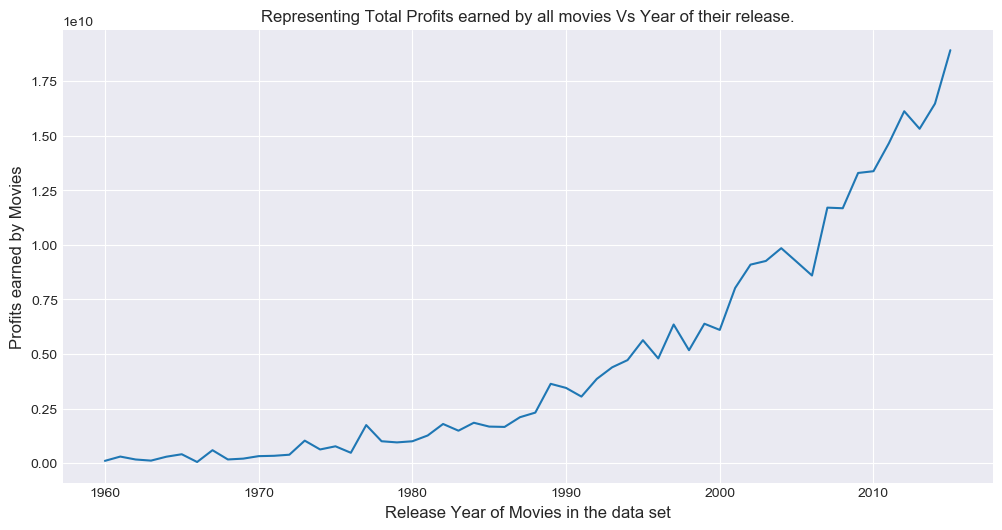

In [25]:
# Visulizing the relation among release_date and profit_earned

plt.figure(figsize=(12,6), dpi = 100)

# On x-axis

plt.xlabel('Release Year of Movies in the data set', fontsize = 12)

# On y-axis

plt.ylabel('Profits earned by Movies', fontsize = 12)

# Title of the line plot

plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

# Plot the graph

plt.plot(year_vs_profit)

# Displaying the line plot

plt.show()

Hence from the above graph, we can conclude that the total profit_earned by the movies rises by every year, when compared to the previous years.

And the year with highest profit can found using idxmax

In [26]:
year_vs_profit.idxmax()

2015

Thus the year 2015 can be concluded as the highest profit_earned year among all in the given dataset.

# Research Question 5 : Movies with lowest and highest revenues?

In [27]:
# To get the movie with highest revenue

highest_revenue = df_movies['revenue(US_dollars)'].idxmax()

highest_details_revenue = df_movies.loc[highest_revenue]

# To get the movie with lowest revenue

lowest_revenue = df_movies['revenue(US_dollars)'].idxmin()

lowest_details_revenue = df_movies.loc[lowest_revenue]

revenue_details = pd.concat([highest_details_revenue,lowest_details_revenue],axis=1)

revenue_details



,1386,8142
popularity,9.43277,0.552091
budget(US_dollars),2.37e+08,6e+06
revenue(US_dollars),2.78151e+09,2
original_title,Avatar,Mallrats
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Lee|Jeremy London|Shannen Doherty|Claire...
director,James Cameron,Kevin Smith
tagline,Enter the World of Pandora.,They're not there to shop. They're not there t...
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Romance|Comedy
release_date,2009-12-10 00:00:00,1995-10-20 00:00:00


From the above results, we can conclude that the movie with highest revenue is Avatar and the movie with lowest revenue was Mallrats.

# Research Question 6 : Number of profitable movies released in each month?

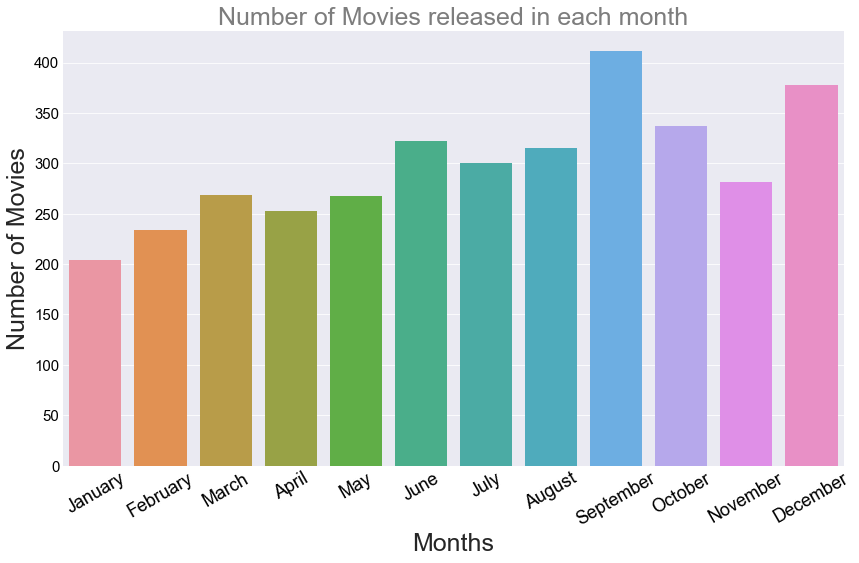

In [28]:
# create a new dataframe with index as date so as to extract movie data according to month

index_date_dataset = df_movies.set_index('release_date')

# Extracting data according to month since release_data is set as index

groupby_month = index_date_dataset.groupby([(index_date_dataset.index.month)])

# calculating the numbers of movies released each month

monthly_count = groupby_month['profit_earned(US_dollars)'].count()

# convert the table into dataframe to plot the visual

monthly_count_dataframe = pd.DataFrame(monthly_count)

# list of months

month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plotting the visual using seaborn 

monthly_bar = sns.barplot(x = monthly_count_dataframe.index, y = monthly_count_dataframe['profit_earned(US_dollars)'],data=monthly_count_dataframe)

# setting size of the graph

monthly_bar.figure.set_size_inches(14,8)

# setting the title and customizing

monthly_bar.axes.set_title('Number of Movies released in each month', fontsize = 25, alpha = 0.6)

# setting x-label

monthly_bar.set_xlabel("Months", fontsize = 25)

# setting y-label

monthly_bar.set_ylabel("Number of Movies", fontsize = 25)

# customizing axes values

monthly_bar.tick_params(labelsize = 15, labelcolor="black")

# rotating the x-axis values to make it readable

monthly_bar.set_xticklabels(month_list, rotation = 30, size = 18)

# shows the plot

plt.show()


By observing the above trends of profitable movies with respect to their release month.

In september the number of movies released are relatively high.

Lets see the profits that was made by the movie with respect to their release months

# Research Question 7 : Profits made by movie with respect to their release month?

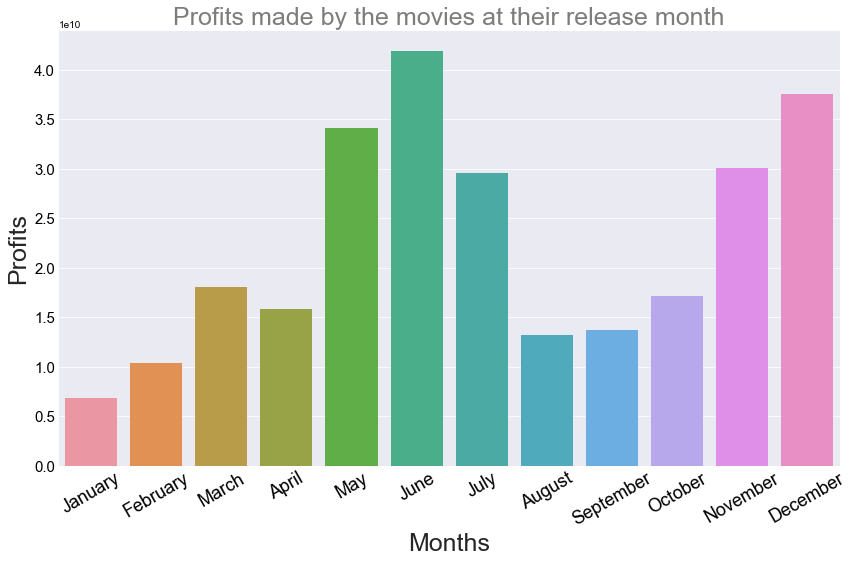

In [29]:
# Calculating monthly profit

monthly_profit = groupby_month['profit_earned(US_dollars)'].sum()

#converting table to a dataframe

monthly_profit_earned = pd.DataFrame(monthly_profit)

monthly_profit_bar = sns.barplot(x=monthly_profit_earned.index,y=monthly_profit_earned['profit_earned(US_dollars)'],data=monthly_profit_earned)

# setting size of the graph

monthly_profit_bar.figure.set_size_inches(14,8)

# setting the title and customizing

monthly_profit_bar.axes.set_title('Profits made by the movies at their release month', fontsize = 25, alpha = 0.6)

# setting x-label

monthly_profit_bar.set_xlabel("Months", fontsize = 25)

# setting y-label

monthly_profit_bar.set_ylabel("Profits", fontsize = 25)

# customizing axes values

monthly_profit_bar.tick_params(labelsize = 15, labelcolor="black")

# rotating the x-axis values to make it readable

monthly_profit_bar.set_xticklabels(month_list, rotation = 30, size = 18)

# shows the plot

plt.show()

From both the visualizations of both graphs we see similar trend. Where there are more movie released there is more profit and vice versa. 

Except for the month september. In september the number of movies release is highest in terms whereas the total profit is drastically low when compared to the number of movies.

June has the movie with highest profit_earned. And december occupies the second position. So it is likely that the movies released in June and December are more likely to earn more profits from the above visualizations.

# Research Question 8 : Which director directed the most films?

In [30]:
# Defining a function to split the data that was seperated by a '|' sperator

def seperate_data(data_to_seperate):
    
    # will take a column, and separate the string by '|' 
    # so that we can seperate using that seperator
    
    common_data_seperated = df_movies[data_to_seperate].str.cat(sep="|")
    
    # Splitting the director data
    
    seperated_data = pd.Series(common_data_seperated.split('|'))
    
    # Performing count of seperated data
    
    result_data_counts = seperated_data.value_counts(ascending = False)
    
    return result_data_counts,seperated_data

In [31]:
# Calling seperate_data function to split the data using seperator

director_movie_counts,director_seperated_data = seperate_data('director')

# Visualizing the data

director_movie_counts

Steven Spielberg             27
Clint Eastwood               21
Ridley Scott                 20
Steven Soderbergh            17
Tim Burton                   17
Robert Rodriguez             16
Brian De Palma               15
Martin Scorsese              15
Renny Harlin                 15
Robert Zemeckis              14
Tony Scott                   14
Joel Schumacher              14
Wes Craven                   14
Oliver Stone                 14
Ron Howard                   14
Francis Ford Coppola         13
Richard Donner               13
Peter Farrelly               13
Walter Hill                  12
Quentin Tarantino            12
Barry Levinson               12
John Carpenter               12
Richard Linklater            11
Peter Jackson                11
Michael Bay                  11
Joel Coen                    11
Bobby Farrelly               11
Kevin Smith                  11
David Cronenberg             10
Shawn Levy                   10
                             ..
Sanjay G

# Research Question 9 : Director vs Profit?

From the above results, Steven Spielberg (27 movies) directed more number of movies among all data of directors provided in the dataset.

In [32]:
# Grouping of director and profit_earned(US_dollars)

directors_data = df_movies.groupby('director')['profit_earned(US_dollars)'].sum()

# Finding the id of director with minimum profit making

director_mix_profit = directors_data.idxmin()

director_mix_profit


'Sngmoo Lee'

In [33]:
# Visualizing the data of lowest profit making director

df_movies[df_movies['director'] == 'Sngmoo Lee']

,popularity,budget(US_dollars),revenue(US_dollars),original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year,profit_earned(US_dollars)
2244,0.25054,425000000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Assassin. Hero. Legend.,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,6.4,2010,-413912431.0


In [34]:
# Finding the id of director with maximun profit making

director_max_profit = directors_data.idxmax()

director_max_profit

'Steven Spielberg'

In [35]:
# Visualizing the data of highest profit making director

df_movies[df_movies['director'] == 'Steven Spielberg']

,popularity,budget(US_dollars),revenue(US_dollars),original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year,profit_earned(US_dollars)
33,3.648210,40000000.0,162610473.0,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,Steven Spielberg,"In the shadow of war, one man showed the world...",141,Thriller|Drama,2015-10-15,1638,7.1,2015,122610473.0
1334,1.104816,20000000.0,303788635.0,Close Encounters of the Third Kind,Richard Dreyfuss|FranÃ§ois Truffaut|Teri Garr|...,Steven Spielberg,We are not alone.,135,Science Fiction|Drama,1977-11-16,600,7.0,1977,283788635.0
2638,2.971372,100000000.0,235926552.0,A.I. Artificial Intelligence,Haley Joel Osment|Frances O'Connor|Sam Robards...,Steven Spielberg,Journey to a world where robots dream and desire.,146,Drama|Science Fiction|Adventure,2001-06-29,1133,6.6,2001,135926552.0
2879,3.161670,185000000.0,786636033.0,Indiana Jones and the Kingdom of the Crystal S...,Harrison Ford|Cate Blanchett|Shia LaBeouf|Ray ...,Steven Spielberg,The adventure continues . . .,122,Adventure|Action,2008-05-21,1537,5.6,2008,601636033.0
3397,2.234300,130000000.0,371940071.0,The Adventures of Tintin,Jamie Bell|Andy Serkis|Daniel Craig|Nick Frost...,Steven Spielberg,"This year, discover how far adventure will tak...",107,Adventure|Animation|Action|Family|Mystery,2011-10-25,1448,6.6,2011,241940071.0
3414,1.592819,66000000.0,177584879.0,War Horse,Tom Hiddleston|Benedict Cumberbatch|Toby Kebbe...,Steven Spielberg,Separated by War. Tested by Battle. Bound by F...,146,Drama|War,2011-12-25,611,6.9,2011,111584879.0
3918,2.973115,52000000.0,352114312.0,Catch Me If You Can,Leonardo DiCaprio|Tom Hanks|Christopher Walken...,Steven Spielberg,The true story of a real fake.,141,Drama|Crime,2002-12-25,2277,7.6,2002,300114312.0
3921,2.103595,102000000.0,358372926.0,Minority Report,Tom Cruise|Colin Farrell|Samantha Morton|Max v...,Steven Spielberg,The system is perfect until it comes after you.,145,Action|Thriller|Science Fiction|Mystery,2002-06-20,1595,6.9,2002,256372926.0
5387,0.221360,36000000.0,74000000.0,Amistad,Morgan Freeman|Nigel Hawthorne|Anthony Hopkins...,Steven Spielberg,Freedom is not given. It is our right at birth...,155,Drama|History|Mystery,1997-12-03,167,6.6,1997,38000000.0
5391,0.210550,73000000.0,229074524.0,The Lost World: Jurassic Park,Jeff Goldblum|Julianne Moore|Pete Postlethwait...,Steven Spielberg,Something has survived.,129,Adventure|Action|Science Fiction,1997-05-23,1655,6.1,1997,156074524.0


From the above results the director with highest profit making is Steven Spielberg who has done 27 movies.

Which was the highest number of movies for a director has done in the given dataset.

So, profit_earned in terms of director is dependant on number of movies he/she has done in most of the cases.

And the lowest profit making director is Sngmoo Lee and he has done 1 movie.

# Research Question 10 : Which genres are most popular? 

In [36]:
# Lets dig into which genre of movies are popular
# Calling seperate_data function to seperate the genere data that was seperated by a seperator

genre_movie_counts,genre_seperated_data = seperate_data('genres')

# Visualizing the data

genre_movie_counts

Drama              1572
Comedy             1255
Thriller           1149
Action             1046
Adventure           720
Crime               614
Romance             595
Science Fiction     505
Horror              454
Family              405
Fantasy             381
Mystery             328
Animation           190
Music               117
History             112
War                 109
Western              49
Documentary          26
Foreign               8
TV Movie              1
dtype: int64

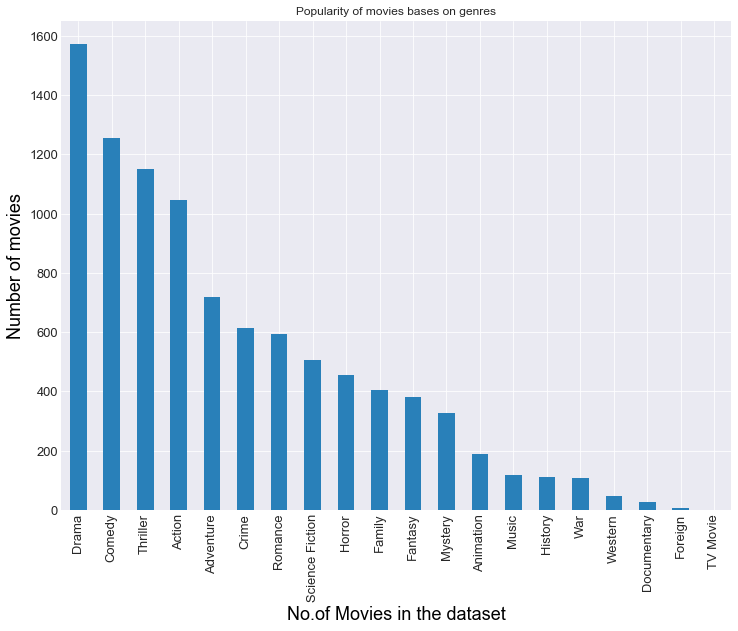

In [37]:
# ploting

plot_genre = genre_movie_counts.plot.bar(color = '#2980b9', fontsize = 13)

# title

plot_genre.set(title = 'Popularity of movies bases on genres')

# on x axis 

plot_genre.set_xlabel('No.of Movies in the dataset', color = 'black', fontsize = '18')

# on x axis 

plot_genre.set_ylabel('Number of movies', color = 'black', fontsize = '18')

# figure size(width, height)

plot_genre.figure.set_size_inches(12, 9)

# ploting the graph

plt.show()

The above visualization clearly depicts that the drama, comedy, Thriller are three genres of movies that are most popular. Among them the genre like drama tops among all different genres.

# Research Question 11 : Cast appeared the most? 

In [38]:
# Lets dig into which genre of movies are popular
# Calling seperate_data function to seperate the genere data that was seperated by a seperator

cast_movie_counts,cast_seperated_data = seperate_data('cast')

# Visualizing the data

cast_movie_counts

Robert De Niro              50
Bruce Willis                44
Samuel L. Jackson           43
Nicolas Cage                41
Matt Damon                  35
Tom Hanks                   34
Tom Cruise                  33
Johnny Depp                 33
Sylvester Stallone          33
Morgan Freeman              33
Eddie Murphy                32
Harrison Ford               32
Brad Pitt                   32
Liam Neeson                 30
Mark Wahlberg               29
Robin Williams              29
Arnold Schwarzenegger       29
Owen Wilson                 28
Denzel Washington           28
Cameron Diaz                28
Julianne Moore              27
Ben Affleck                 27
Ewan McGregor               27
Keanu Reeves                27
Dennis Quaid                27
Jim Carrey                  27
Colin Farrell               26
Meryl Streep                26
Julia Roberts               26
Adam Sandler                26
                            ..
Daniel von Bargen            1
James Fr

'Robert De Niro' takes the crown for appearing the most in movies. And 'Bruce Willis' takes the next position.

# Research Question 12 : Average budget of movies?

In [39]:
# Defing a function that returns the average of data that is passed

def calc_average(data_to_calc):
    
    # Finding the average of passed data using pandas mean() function
    
    average_of_data = df_movies[data_to_calc].mean()
    
    return average_of_data

In [40]:
# Finding the average budget of movies
# Calling calc_average() function to calculate the average budget of movies

budget_mean = calc_average('budget(US_dollars)')

budget_mean

38714747.10414334

The average budget of movies is 38714747.10414334 from above results.

# Research Question 13 : Average revenue of movies?

In [41]:
# Finding the mean of revenue of movies
# Calling the calc_average() function to calculate the average revenue of movies

revenue_mean = calc_average('revenue(US_dollars)')

revenue_mean

113833739.16573349

The average revenue of movies is 113833739.16573349 from above results.

# Research Question 14 : Average profit of movies?

In [42]:
# Finding the mean of profit of movies
# Calling the calc_average() function to calculate the average budget of movies

profit_mean = calc_average('profit_earned(US_dollars)')

profit_mean

75118992.06159015

The average profit of movies is 75118992.06159015 from above results.

# Research Question 15: What variables are associated with the runtime of movies over the years?

In [59]:
# using correlation to determine factors influencing runtime

df_movies.corr(method="pearson")

,popularity,budget(US_dollars),revenue(US_dollars),runtime,vote_count,vote_average,release_year,profit_earned(US_dollars)
popularity,1.000000,0.439475,0.610211,0.228956,0.777156,0.326976,0.178819,0.591877
budget(US_dollars),0.439475,1.000000,0.686281,0.273169,0.553164,0.028777,0.283522,0.525176
revenue(US_dollars),0.610211,0.686281,1.000000,0.265712,0.751988,0.235981,0.148222,0.979377
runtime,0.228956,0.273169,0.265712,1.000000,0.291923,0.364649,-0.109462,0.235005
vote_count,0.777156,0.553164,0.751988,0.291923,1.000000,0.400183,0.215197,0.726177
vote_average,0.326976,0.028777,0.235981,0.364649,0.400183,1.000000,-0.132934,0.268108
release_year,0.178819,0.283522,0.148222,-0.109462,0.215197,-0.132934,1.000000,0.094665
profit_earned(US_dollars),0.591877,0.525176,0.979377,0.235005,0.726177,0.268108,0.094665,1.000000


From, the above correlation answers, we can see that :

Runtime is correlated positively with popularity and profit earned.

Runtime is negatively correlated with relase_year.

# Runtime vs Popularity

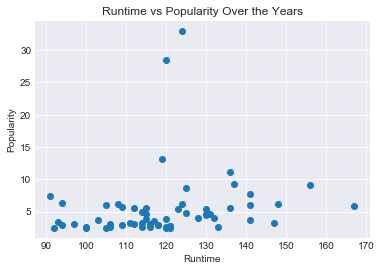

In [73]:
# Creating a scatterplot of runtime and popularity over the years

plt.scatter(x=df_movies['runtime'].head(60), y=df_movies['popularity'].head(60))

plt.xlabel('Runtime')

plt.ylabel('Popularity')

plt.title('Runtime vs Popularity Over the Years');

The correlation computed from function is evident in the scatterplot.

Popularity is proportional to runtime.

Should look more into the few outliers that are extremely popular

# Runtime vs Profit Earned

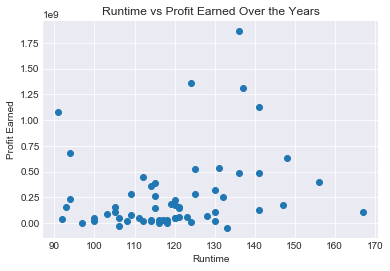

In [72]:
# Creating a scatterplot of runtime and profit_earned over the years

plt.scatter(x=df_movies['runtime'].head(60), y=df_movies['profit_earned(US_dollars)'].head(60))

plt.xlabel('Runtime')

plt.ylabel('Profit Earned')

plt.title('Runtime vs Profit Earned Over the Years');

The correlation computed from function is evident in the scatterplot.

Profit earned is proportional to runtime.

Should look more into the few outliers that earned more profits.

# Runtime vs Release Year

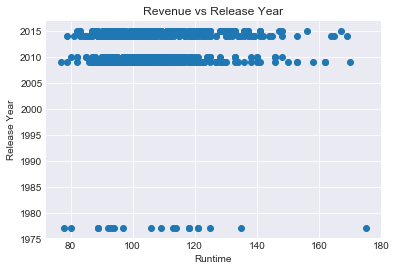

In [75]:
# Creating a scatterplot of runtime and release_year 

plt.scatter(x=df_movies['runtime'].head(600), y=df_movies['release_year'].head(600))

plt.xlabel('Runtime')

plt.ylabel('Release Year')

plt.title('Revenue vs Release Year');

Release year and Runtime are negatively correlated. From above results we can clearly state that runtime does not depends on release year.

As everyone knows it. My desire to observe the negatively correlated distribution. So i choose release year for analysing associations with runtime.

# Conclusion

# From the above answered questions , I want to conclude that

Ideal months for releasing movies so that they high probability of earning profits are June, December, May and November because many movies released in those months have earned much profits than others.

Ideal directors for taking movies Steven Spielberg, Clint Eastwood, Ridley Scott and  Tim Burton as they have high success rate when compared to the other directors.

Ideal cast for taking movies Robert De Niro, Bruce Willis, Samuel L. Jackson and Nicolas Cage as they have high success rate when compared to the other cast.

Ideal genre for taking movies are Drama, Comedy, Thriller, Action . As these genres are more popular, the scope of getting profits are relatively high for these genres.

Due to increased stress in the works, demand for movies to get relieve from stress increased a lot. That's the reason i think profits are increasing year by year as moviegoers increasing (i.e, Number of moviegoers is out of scope basing on this dataset, Its my estimation to justify the correlation among profit and year).

Profit earned by movies and popularity of movies depends on runtime whereas releases and runtime are independant attributes.

By considering all the above, the probability of getting high profits is more.

### Limitations:

I want to make it clear, it's not a 100 percent good solutions. Many optimisations can be done and can dig more into
the data that is provided. As i am beginner to this field, i analysed this data in all areas that i can, And can even 
done more. For example director vs profit can be done by storing the new data of director that was split by seperator 
that was included. And can correlate director with profit in much more depth. This was the idea that want to do by got 
struct, I will work on it and in further i will perform the analysis in much more depth. And even much more questions 
can be answered with more digging into data.

At the beginning state, the dataset taken for analysis has about 10866 rows of data and about 21 columns. From the dataset the columns like id,imdb_id,budget_adj,revenue_adj,homepage,keywords,overview,production_companies were removed as i thought that they do not hold much interestingness for my analysis. Even they can be used to dig more into the data by someone. Rightnow, as i am beginner i thought these 8 columns doesn't hold any interestingness. So i proceeded by removing them.

In the dataset null values are present in cast, director, tagline, genres. Since they are of string datatype. They cannot be filled using techniqes like mean, median etc. But these null values can be predicted and filled using machine learning techniques like regression etc. At the time of performing tmdb movie data analysis, I am not aware of those techniques. So i removed all those null values from the dataset, and the resultant dataset has 8002 rows of data. Scope for performing more accurate analysis and deriving much accurate results by filling those values with machine learning techniques can be possible.

Details like budget and revenue are missing in the dataset. So that might be they are filled as zero. I carried on analysis by replacing all zeros in budget and revenue with numpy's null, and removed all null values. So the resultant analysis has an limitation that these null values can be filled with mean, and more accurate analysis can be performed. The final dataset holds about only 3572 rows of data and 13 columns. 

This was the work done by me in the beginner stage. And analysis is done on a limited data by removing all null values.
And that's my conclusion!
